In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src import config, data_utils, data_procces


# Data Preprocessing

## 1) Download and Read Data

### Dataset using for this project:

- `H_MHAS_c2.dta`: Harmonized MHAS data file (Stata extension) incorporates data from the core interview data, the master follow-up file, household roster data, and next-of-kin data

In [3]:
# Download the Stata file directly from the origin URL
data_utils.download_stata_file()

Output directory: c:\Users\Production\Desktop\ElderlyHospitalizationPrediction_2\model_hospitalization_prediction\dataset
File path: c:\Users\Production\Desktop\ElderlyHospitalizationPrediction_2\model_hospitalization_prediction\dataset\H_MHAS_c2.dta
Stata file downloaded successfully.


In [4]:
# Extract the data from the STATA file, and load it into a dataframe.
df = data_utils.load_dataset(config.ROOT_PATH, config.DATASET_FOLDER, config.DATASET_NAME)

Full file path: c:\Users\Production\Desktop\ElderlyHospitalizationPrediction_2\model_hospitalization_prediction\dataset//H_MHAS_c2.dta
Dataset loaded successfully.


In [5]:
# verify the first records
df.head()

,codent01,codent03,ps3,ent2,np,unhhidnp,rahhidnp,tipent_01,tipent_03,tipent_12,...,s4satlife_m,s5satlife_m,r3satlifez,r4satlifez,r5satlifez,s3satlifez,s4satlifez,s5satlifez,r2cantril,s2cantril
0,1.Selected person,1.Selected person in 2001,1.0,1.0,10,110.0,110,"12.Direct, second interview","12.Direct, second interview","1.Direct, follow-up interview",...,NaN,NaN,1.510731,NaN,NaN,1.510731,NaN,NaN,1.0,NaN
1,2.Spouse of selected person,2.Spouse of selected person in 2001,2.0,2.0,20,120.0,120,"11.Direct, first interview","11.Direct, first interview","1.Direct, follow-up interview",...,NaN,NaN,1.510731,-0.387025,-0.393398,1.510731,NaN,NaN,NaN,1.0
2,1.Selected person,1.Selected person in 2001,1.0,1.0,10,210.0,210,"11.Direct, first interview","22.Proxy, second interview","1.Direct, follow-up interview",...,NaN,NaN,-0.397267,-0.387025,-0.393398,NaN,NaN,NaN,NaN,5.0
3,2.Spouse of selected person,2.Spouse of selected person in 2001,2.0,2.0,20,220.0,220,"12.Direct, second interview","11.Direct, first interview","3.Proxy, follow-up interview",...,1.Agree,NaN,NaN,NaN,NaN,-0.397267,-0.387025,NaN,5.0,NaN
4,1.Selected person,1.Selected person in 2001,1.0,1.0,10,310.0,310,"11.Direct, first interview","11.Direct, first interview","1.Direct, follow-up interview",...,1.Agree,1.Agree,-0.397267,-0.387025,-0.393398,-0.397267,-0.387025,-0.393398,1.0,NaN


### Dataset Size

In [6]:
print(f'The dataset contains {df.shape[0]} rows, and {df.shape[1]} columns')

The dataset contains 26839 rows, and 5241 columns


### Null values

#### Count null values per column

In [7]:
null_counts = df.isnull().sum()
print(null_counts)

codent01      11474
codent03      11609
ps3           11474
ent2          11609
np                0
              ...  
s3satlifez    17006
s4satlifez    17684
s5satlifez    19843
r2cantril     16591
s2cantril     19576
Length: 5241, dtype: int64


In [8]:
columns_with_nulls = df.columns[df.isnull().any()].tolist()
print(f' There is {len(columns_with_nulls)} columns with NaN values')

 There is 5192 columns with NaN values


In [9]:
print(f' There is only {len(df.columns) - len(columns_with_nulls)} columns with NO NaN values')

 There is only 49 columns with NO NaN values


#### Column names

In [10]:
for column in df:
    print(column)

codent01
codent03
ps3
ent2
np
unhhidnp
rahhidnp
tipent_01
tipent_03
tipent_12
tipent_15
tipent_18
unhhid
cunicah
h1hhid
h2hhid
h3hhid
h4hhid
h5hhid
h1hhidc
h2hhidc
h3hhidc
h4hhidc
h5hhidc
acthog
subhog_01
subhog_03
subhog_12
subhog_15
subhog_18
s1hhidnp
s2hhidnp
s3hhidnp
s4hhidnp
s5hhidnp
inw1
inw2
inw3
inw4
inw5
r1iwstat
r2iwstat
r3iwstat
r4iwstat
r5iwstat
s1iwstat
s2iwstat
s3iwstat
s4iwstat
s5iwstat
hacohort
r1proxy
r2proxy
r3proxy
r4proxy
r5proxy
s1proxy
s2proxy
s3proxy
s4proxy
s5proxy
h1hhresp
h2hhresp
h3hhresp
h4hhresp
h5hhresp
h1cpl
h2cpl
h3cpl
h4cpl
h5cpl
r1wthh
r2wthh
r3wthh
r4wthh
r5wthh
r1wtresp
r2wtresp
r3wtresp
r4wtresp
r5wtresp
s1wtresp
s2wtresp
s3wtresp
s4wtresp
s5wtresp
r1iwm
r2iwm
r3iwm
r4iwm
r5iwm
s1iwm
s2iwm
s3iwm
s4iwm
s5iwm
r1iwy
r2iwy
r3iwy
r4iwy
r5iwy
s1iwy
s2iwy
s3iwy
s4iwy
s5iwy
r1iwf
r2iwf
r3iwf
r4iwf
r5iwf
s1iwf
s2iwf
s3iwf
s4iwf
s5iwf
rabyear
s1byear
s2byear
s3byear
s4byear
s5byear
rabmonth
s1bmonth
s2bmonth
s3bmonth
s4bmonth
s5bmonth
radyear
s1dyear
s2dyear


#### Identifiers

In [11]:
df_identifiers = df[['codent01', 'codent03', 'ps3', 'ent2', 'np', 'unhhidnp', 'rahhidnp', 'tipent_01', 'tipent_03', 'tipent_12', 'tipent_15', 'tipent_18', 
                     'unhhid', 'cunicah', 'h1hhid', 'h2hhid', 'h3hhid', 'h4hhid', 'h5hhid', 'h1hhidc','h2hhidc', 'h3hhidc', 'h4hhidc', 'h5hhidc', 'acthog', 'subhog_01','subhog_03','subhog_12', 'subhog_15', 'subhog_18',
                     's1hhidnp','s2hhidnp', 's3hhidnp', 's4hhidnp', 's5hhidnp',
                     'inw1', 'inw2', 'inw3', 'inw4', 'inw5',
                     'r1iwstat', 'r2iwstat', 'r3iwstat', 'r4iwstat', 'r5iwstat', 's1iwstat', 's2iwstat', 's3iwstat', 's4iwstat', 's5iwstat',
                     'hacohort']]

In [13]:
codent01Null = df['codent01'].isnull().sum()
codent03Null = df['codent03'].isnull().sum()
ps3Null = df['ps3'].isnull().sum()
ent2Null = df['ent2'].isnull().sum()
npNull = df['np'].isnull().sum()
unhhidnpNull = df['unhhidnp'].isnull().sum()
rahhidnpNull = df['rahhidnp'].isnull().sum()
tipent_01Null = df['tipent_01'].isnull().sum()
tipent_03Null = df['tipent_03'].isnull().sum()
tipent_12Null = df['tipent_12'].isnull().sum()
tipent_15Null = df['tipent_15'].isnull().sum()
tipent_18Null = df['tipent_18'].isnull().sum()
print(f'The column "codent01" has {codent01Null} null values \n')
print(f'The column "codent03" has {codent03Null} null values \n')
print(f'The column "ps3" has {ps3Null} null values \n')
print(f'The column "ent2" has {ent2Null} null values \n')
print(f'The column "np" has {npNull} null values \n')
print(f'The column "unhhidnp" has {unhhidnpNull} null values \n')
print(f'The column "rahhidnp" has {rahhidnpNull} null values \n')
print(f'The column "tipent_01" has {tipent_01Null} null values \n')
print(f'The column "tipent_03" has {tipent_03Null} null values \n')
print(f'The column "tipent_12" has {tipent_12Null} null values \n')
print(f'The column "tipent_15" has {tipent_15Null} null values \n')
print(f'The column "tipent_18" has {tipent_18Null} null values \n')

The column "codent01" has 11474 null values 

The column "codent03" has 11609 null values 

The column "ps3" has 11474 null values 

The column "ent2" has 11609 null values 

The column "np" has 0 null values 

The column "unhhidnp" has 0 null values 

The column "rahhidnp" has 0 null values 

The column "tipent_01" has 11653 null values 

The column "tipent_03" has 13135 null values 

The column "tipent_12" has 11116 null values 

The column "tipent_15" has 12060 null values 

The column "tipent_18" has 9725 null values 



As we can see, there are 3 columns without null values. For the analysis, we will use the `'unhhidnp'` column to uniquely identify each record. The other columns will be deleted.

## Posible TARGET -> `'rXhosp1y'`

Since we do not have our 'TARGET' variable explicitly, to train our model(s), we need to generate it from the provided data.

### Section C: Health Care Utilization and Insurance 
#### - Medical Care Utilization: Hospital

`rxhosp1y`: Indicates whether the respondent reports at least one overnight hospital stay in the last 12 months. It is coded as 0 if the respondent had no overnight hospital stays, and is coded as 1 if the respondent had at least one overnight hospital stay.

In the dataset, we have 5 columns refear to each Wave:

- r1hosp1y -> Wave 1 
- r2hosp1y -> Wave 2 
- r3hosp1y -> Wave 3 
- r4hosp1y -> Wave 4 
- r5hosp1y -> Wave 5 

If the column is null, it means that the person did not respond or was not present in the interview of the Wave. 

### In this line, the response of a Wave, is the TARGET data, for the previous wave:

If the person only responded in one Wave, the data is not useful to us. If they attended, for example, Wave 1 and Wave 2, the data from Wave 2 will be the TARGET for Wave 1, and so on.

In [14]:
df['r1hosp1y'].value_counts()

r1hosp1y
0.No     13681
1.Yes     1469
Name: count, dtype: int64

In [15]:
df['r2hosp1y'].value_counts()

r2hosp1y
0.No     12147
1.Yes     1548
Name: count, dtype: int64

In [16]:
df['r3hosp1y'].value_counts()

r3hosp1y
0.No     13920
1.Yes     1789
Name: count, dtype: int64

In [17]:
df['r4hosp1y'].value_counts()

r4hosp1y
0.No     12698
1.Yes     2055
Name: count, dtype: int64

In [18]:
df['r5hosp1y'].value_counts()

r5hosp1y
0.No     14714
1.Yes     2332
Name: count, dtype: int64

## 2) Data Cleaning

#### a) Create a new feature to save responses

In [19]:
# Create a new column with nan values.
df['responses'] = np.nan

C:\Users\Production\AppData\Local\Temp\ipykernel_2852\2023795716.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['responses'] = np.nan


#### b) Count how many responses the person has, and fill the new column with values

To start with the cleaning, we are going to count the number of responses the person has for the columns related to `'rxhosp1y'`. Then, for each row, count how many not-null values the columns have

In [20]:
# In 'res' we are going to count rows with less than 2 responses for the feature 'rxhosp1y'. 
# The final value of 'res' represents how many rows we are going to delete
res = 0

# Fill the new column 'responses', with the number of responses
for index, _ in df.iterrows():
    n = 0
    if not pd.isna(df['r1hosp1y'][index]):
        n+=1
    if not pd.isna(df['r2hosp1y'][index]):
        n+=1
    if not pd.isna(df['r3hosp1y'][index]):
        n+=1
    if not pd.isna(df['r4hosp1y'][index]):
        n+=1
    if not pd.isna(df['r5hosp1y'][index]):
        n+=1
    if n<=1:
        res+=1
    df['responses'][index] = n

print(f'Rows to delete: {res}')

C:\Users\Production\AppData\Local\Temp\ipykernel_2852\3906204129.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['responses'][index] = n
C:\Users\Production\AppData\Local\Temp\ipykernel_2852\3906204129.py:20: SettingWithCopyWarning: 

Rows to delete: 7065


### `'responses'` Distribution -> Number of responses per person

In [21]:
### Response distribution
value_counts = df['responses'].value_counts().sort_index()
value_counts

responses
0.0      28
1.0    7037
2.0    5206
3.0    5845
4.0    2246
5.0    6477
Name: count, dtype: int64

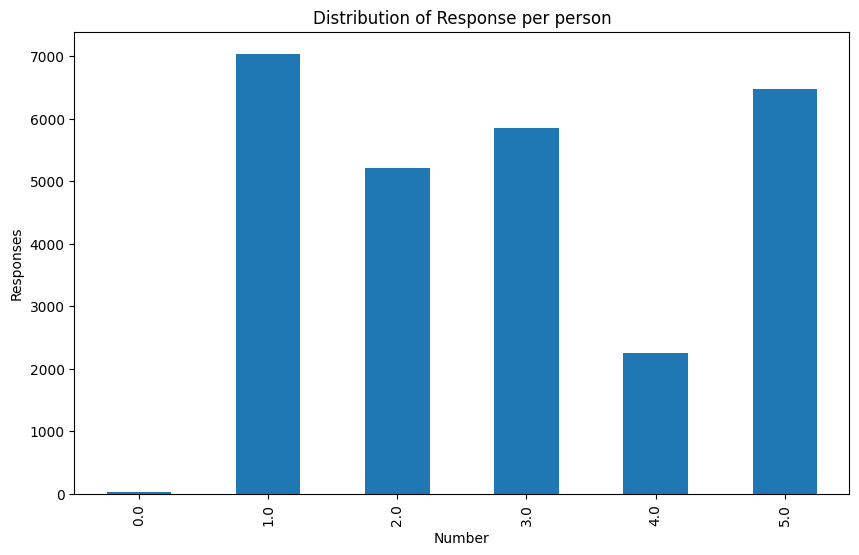

In [22]:
# Plot 'responses' column
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')

plt.title('Distribution of Response per person')
plt.xlabel('Number')
plt.ylabel('Responses')

plt.show()

### c) Delete rows with less than 2 responses

In [23]:
# Mask to filter responses with less than 2 counts
mask_responses = df['responses'] > 1

In [24]:
# Filter applied
df_cleaned = df[mask_responses]

In [25]:
# New value distribution
df_cleaned['responses'].value_counts().sort_index()

responses
2.0    5206
3.0    5845
4.0    2246
5.0    6477
Name: count, dtype: int64

In [26]:
df_cleaned.columns

Index(['codent01', 'codent03', 'ps3', 'ent2', 'np', 'unhhidnp', 'rahhidnp',
       'tipent_01', 'tipent_03', 'tipent_12',
       ...
       's5satlife_m', 'r3satlifez', 'r4satlifez', 'r5satlifez', 's3satlifez',
       's4satlifez', 's5satlifez', 'r2cantril', 's2cantril', 'responses'],
      dtype='object', length=5242)

### d) Clean id columns:

Delete all columns related to ids, except for 'unhhidnp' (which uniquely identify each record), and 'inwx' to know if a person respond in each wave.

In [27]:
# All column ids we want to delete
column_id_list = ['codent01', 'codent03', 'ps3', 'ent2', 'np', 'unhhid', 'rahhidnp', 'tipent_01', 'tipent_03', 'tipent_12', 'tipent_15', 'tipent_18', 
                'cunicah', 'h1hhid', 'h2hhid', 'h3hhid', 'h4hhid', 'h5hhid', 'h1hhidc','h2hhidc', 'h3hhidc', 'h4hhidc', 'h5hhidc', 'acthog', 'subhog_01',
                'subhog_03','subhog_12', 'subhog_15', 'subhog_18', 's1hhidnp','s2hhidnp', 's3hhidnp', 's4hhidnp', 's5hhidnp', 'r1iwstat', 'r2iwstat', 'r3iwstat', 'r4iwstat', 
                'r5iwstat', 's1iwstat', 's2iwstat', 's3iwstat', 's4iwstat', 's5iwstat', 'hacohort']

# Delete inplace, to clean our dataset
df_cleaned.drop(columns=[col for col in column_id_list if col in df.columns], inplace=True)

C:\Users\Production\AppData\Local\Temp\ipykernel_2852\167010337.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=[col for col in column_id_list if col in df.columns], inplace=True)


## 3) Transform Data

Upon examining the data, it was identified that there are some columns that refer only to specific Waves. To achieve uniform treatment and normalize the data, the following steps will be taken:

* Identify the columns that do not exist for all 5 Waves.

* Create the missing columns for each Wave and insert them into the original dataset in the appropriate order.

* Remove Columns Present in Only One Wave

In [28]:
# New dimensions
df_cleaned.shape

(19774, 5197)

###  Remove Columns Present in Only One Wave

* The function ``remove_columns_present_in_one_wave``, checks for columns that exist in only one wave and removes them from the DataFrame.


In [29]:
# New DataFrame witout columns present in only one wave
df_dropped = data_utils.remove_columns_present_in_one_wave(df_cleaned)
df_dropped.shape

column to drop ['r5hip', 's5hip', 'c2000cpindex', 'c2001cpindex', 'c2002cpindex', 'c2003cpindex', 'c2011cpindex', 'c2012cpindex', 'c2013cpindex', 'c2014cpindex', 'c2015cpindex', 'c2016cpindex', 'c2017cpindex', 'c2018cpindex', 'c2019cpindex', 'r1jhoursd', 's1jhoursd', 'r3systo1', 's3systo1', 'r3systo2', 's3systo2', 'r3systo', 's3systo', 'r3diasto1', 's3diasto1', 'r3diasto2', 's3diasto2', 'r3diasto', 's3diasto', 'r3pulse1', 's3pulse1', 'r3pulse2', 's3pulse2', 'r3pulse', 's3pulse', 'r3bpcomp', 's3bpcomp', 'r3bpsft', 's3bpsft', 'r3bpref', 's3bpref', 'r3wspeed1', 's3wspeed1', 'r3wspeed2', 's3wspeed2', 'r3wspeed', 's3wspeed', 'r3walkcomp', 's3walkcomp', 'r3walkaid_m', 's3walkaid_m', 'r3walksft', 's3walksft', 'r3walktryu', 's3walktryu', 'r3walkref', 's3walkref', 'r3walkothr', 's3walkothr', 'r3domhand', 's3domhand', 'r3rgrip1', 's3rgrip1', 'r3rgrip2', 's3rgrip2', 'r3rgrip', 's3rgrip', 'r3lgrip1', 's3lgrip1', 'r3lgrip2', 's3lgrip2', 'r3lgrip', 's3lgrip', 'r3gripsum', 's3gripsum', 'r3gripcomp', 

(19774, 5112)

### Dataframe Normalization

* The ``normalize_columns`` function standardizes column names across multiple waves by ensuring that missing columns are filled with NaN.

In [30]:
# New DataFrame with missing columns added
df_transformed = data_utils.normalize_columns(df_dropped)

c:\Users\Production\Desktop\ElderlyHospitalizationPrediction_2\model_hospitalization_prediction\src\data_utils.py:97: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy.insert(loc=pos, column=check, value= np.nan)
c:\Users\Production\Desktop\ElderlyHospitalizationPrediction_2\model_hospitalization_prediction\src\data_utils.py:97: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy.insert(loc=pos, column=check, value= np.nan)
c:\Users\Production\Desktop\ElderlyHospitalizationPrediction_2\model_hospitalization_prediction\src\

In [31]:
df_transformed.shape

(19774, 5781)

## Split data:

In the next step, with the split_dataset() function, the dataset will be separated into five:

- df_wave_1 -> With all columns related to Wave 1.
- df_wave_2 -> With all columns related to Wave 2.
- df_wave_3 -> With all columns related to Wave 3.
- df_wave_4 -> With all columns related to Wave 4.
- df_wave_5 -> With all columns related to Wave 5

In [32]:
df_wave_1 = data_utils.split_dataset(df_transformed, '1')
df_wave_2 = data_utils.split_dataset(df_transformed, '2')
df_wave_3 = data_utils.split_dataset(df_transformed, '3')
df_wave_4 = data_utils.split_dataset(df_transformed, '4')
df_wave_5 = data_utils.split_dataset(df_transformed, '5')

c:\Users\Production\Desktop\ElderlyHospitalizationPrediction_2\model_hospitalization_prediction\src\data_utils.py:163: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_wave[column] = df[column]
c:\Users\Production\Desktop\ElderlyHospitalizationPrediction_2\model_hospitalization_prediction\src\data_utils.py:163: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_wave[column] = df[column]
c:\Users\Production\Desktop\ElderlyHospitalizationPrediction_2\model_hospitalization_prediction\src\data_utils.py:163: PerformanceWarning: DataFra

In [33]:
if len(df_wave_1.columns) == len(df_wave_2.columns) == len(df_wave_3.columns) == len(df_wave_4.columns) == len(df_wave_5.columns):
    print(f'All datasets has {len(df_wave_1.columns)} columns')
else:
    raise AssertionError

All datasets has 1153 columns


## Generate the `'TARGET'` value

Using the `'rXhosp1y'` column for the next Wave, we create the 'TARGET' column for each Wave.

The five datasets, will be reduced to four, as we do not have information about the 'rXhosp1y' column for Wave number six (Wave 6).

In [34]:
df_wave_1 = data_utils.get_target_value(df_wave_1, df_wave_2, 1)
df_wave_2 = data_utils.get_target_value(df_wave_2, df_wave_3, 2)
df_wave_3 = data_utils.get_target_value(df_wave_3, df_wave_4, 3)
df_wave_4 = data_utils.get_target_value(df_wave_4, df_wave_5, 4)

c:\Users\Production\Desktop\ElderlyHospitalizationPrediction_2\model_hospitalization_prediction\src\data_utils.py:192: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_wave['TARGET'][index] = df_next_wave[target][index]
c:\Users\Production\D

### Filter nan values

As previously mentioned, the `'inwX'` column indicates whether the person was present or not in the Wave. To clean the data, we create masks for each specific dataset to obtain only the records of people who attended the Wave.

In [35]:
df_wave_1 = df_wave_1[df_wave_1['inw1']=='1.Resp, alive']
df_wave_1

,unhhidnp,inw1,r1proxy,s1proxy,h1hhresp,h1cpl,r1wthh,r1wtresp,s1wtresp,r1iwm,...,s1lchnot3,r1lsatsc3,s1lsatsc3,r1lsatsc3m,s1lsatsc3m,r1satlife_m,s1satlife_m,r1satlifez,s1satlifez,TARGET
0,110.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,312.0,300.0,300.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.No
1,120.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,312.0,300.0,300.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.No
2,210.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,263.0,253.0,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.No
3,220.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,263.0,0.0,253.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.No
4,310.0,"1.Resp, alive",0.Not proxy,NaN,1.0,0.No,471.0,454.0,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15715,1099620.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,4010.0,0.0,4013.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.No
15716,1099710.0,"1.Resp, alive",0.Not proxy,NaN,1.0,0.No,4010.0,4013.0,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15717,1099810.0,"1.Resp, alive",1.Proxy,NaN,1.0,0.No,5653.0,5587.0,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.No
15719,1100010.0,"1.Resp, alive",1.Proxy,0.Not proxy,2.0,1.Yes,5653.0,5587.0,5587.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.Yes


In [36]:
df_wave_2 = df_wave_2[df_wave_2['inw2']=='1.Resp, alive']
df_wave_2

,unhhidnp,inw2,r2proxy,s2proxy,h2hhresp,h2cpl,r2wthh,r2wtresp,s2wtresp,r2iwm,...,s2lchnot3,r2lsatsc3,s2lsatsc3,r2lsatsc3m,s2lsatsc3m,r2satlife_m,s2satlife_m,r2satlifez,s2satlifez,TARGET
0,110.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,314.0,314.0,314.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.No
1,120.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,314.0,314.0,314.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.No
2,210.0,"1.Resp, alive",1.Proxy,0.Not proxy,2.0,1.Yes,265.0,265.0,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.No
3,220.0,"1.Resp, alive",0.Not proxy,1.Proxy,2.0,1.Yes,0.0,0.0,265.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.No
4,310.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,475.0,475.0,471.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15714,1099610.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,4767.0,4767.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15715,1099620.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,0.0,0.0,4767.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15717,1099810.0,"1.Resp, alive",0.Not proxy,NaN,1.0,0.No,5587.0,5587.0,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.No
15719,1100010.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,5587.0,5587.0,5587.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.Yes


In [37]:
df_wave_3 = df_wave_3[df_wave_3['inw3']=='1.Resp, alive']
df_wave_3

,unhhidnp,inw3,r3proxy,s3proxy,h3hhresp,h3cpl,r3wthh,r3wtresp,s3wtresp,r3iwm,...,s3lchnot3,r3lsatsc3,s3lsatsc3,r3lsatsc3m,s3lsatsc3m,r3satlife_m,s3satlife_m,r3satlifez,s3satlifez,TARGET
0,110.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,313.0,329.0,329.0,11.0,...,2.Neutral,2.6,2.2,0,0.0,2.Neutral,2.Neutral,1.510731,1.510731,NaN
1,120.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,313.0,329.0,329.0,11.0,...,2.Neutral,2.2,2.6,0,0.0,2.Neutral,2.Neutral,1.510731,1.510731,0.No
2,210.0,"1.Resp, alive",0.Not proxy,1.Proxy,2.0,1.Yes,264.0,278.0,0.0,11.0,...,NaN,3.0,NaN,0,5.0,1.Agree,NaN,-0.397267,NaN,0.No
3,220.0,"1.Resp, alive",1.Proxy,0.Not proxy,2.0,1.Yes,264.0,0.0,278.0,10.0,...,3.Agree,NaN,3.0,5,0.0,NaN,1.Agree,NaN,-0.397267,1.Yes
4,310.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,472.0,498.0,494.0,11.0,...,1.Disagree,2.4,2.6,0,0.0,1.Agree,1.Agree,-0.397267,-0.397267,0.No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22098,1512820.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,2737.0,3009.0,3009.0,11.0,...,1.Disagree,2.2,2.6,0,0.0,1.Agree,1.Agree,-0.397267,-0.397267,0.No
22099,1512910.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,2500.0,2706.0,2706.0,11.0,...,2.Neutral,2.8,2.6,0,0.0,1.Agree,1.Agree,-0.397267,-0.397267,0.No
22100,1512920.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,2500.0,2706.0,2706.0,11.0,...,3.Agree,2.6,2.8,0,0.0,1.Agree,1.Agree,-0.397267,-0.397267,0.No
22101,1513010.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,2991.0,2991.0,2991.0,10.0,...,2.Neutral,2.4,2.0,0,0.0,2.Neutral,1.Agree,1.510731,-0.397267,0.No


In [38]:
df_wave_4 = df_wave_4[df_wave_4['inw4']=='1.Resp, alive']
df_wave_4

,unhhidnp,inw4,r4proxy,s4proxy,h4hhresp,h4cpl,r4wthh,r4wtresp,s4wtresp,r4iwm,...,s4lchnot3,r4lsatsc3,s4lsatsc3,r4lsatsc3m,s4lsatsc3m,r4satlife_m,s4satlife_m,r4satlifez,s4satlifez,TARGET
1,120.0,"1.Resp, alive",0.Not proxy,NaN,1.0,0.No,444.0,296.0,NaN,11.0,...,NaN,2.8,NaN,0,NaN,1.Agree,NaN,-0.387025,NaN,0.No
2,210.0,"1.Resp, alive",0.Not proxy,1.Proxy,2.0,1.Yes,375.0,250.0,239.0,10.0,...,NaN,2.6,NaN,0,5.0,1.Agree,NaN,-0.387025,NaN,1.Yes
3,220.0,"1.Resp, alive",1.Proxy,0.Not proxy,2.0,1.Yes,375.0,239.0,250.0,10.0,...,3.Agree,NaN,2.6,5,0.0,NaN,1.Agree,NaN,-0.387025,NaN
4,310.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,669.0,448.0,0.0,11.0,...,3.Agree,3.0,3.0,0,0.0,1.Agree,1.Agree,-0.387025,-0.387025,0.No
5,311.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,669.0,0.0,448.0,11.0,...,3.Agree,3.0,3.0,0,0.0,1.Agree,1.Agree,-0.387025,-0.387025,0.No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22098,1512820.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,1692.0,1714.0,1613.0,11.0,...,3.Agree,2.0,2.2,0,0.0,2.Neutral,2.Neutral,1.500595,1.500595,0.No
22099,1512910.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,1581.0,2354.0,1654.0,11.0,...,2.Neutral,2.2,2.2,0,0.0,1.Agree,2.Neutral,-0.387025,1.500595,0.No
22100,1512920.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,1581.0,1654.0,2354.0,11.0,...,2.Neutral,2.2,2.2,0,0.0,2.Neutral,1.Agree,1.500595,-0.387025,0.No
22101,1513010.0,"1.Resp, alive",0.Not proxy,0.Not proxy,2.0,1.Yes,1890.0,2684.0,1914.0,12.0,...,3.Agree,3.0,2.4,0,0.0,1.Agree,1.Agree,-0.387025,-0.387025,NaN


Additionally, we will clean all records where the 'TARGET' variable is not present. These records represent cases where the person did not attend the next Wave

In [39]:
df_wave_1['TARGET'].isnull().sum()

np.int64(341)

In [40]:
df_wave_2['TARGET'].isnull().sum()

np.int64(4110)

In [41]:
df_wave_3['TARGET'].isnull().sum()

np.int64(1587)

In [42]:
df_wave_4['TARGET'].isnull().sum()

np.int64(2670)

### Delete rows with nan values in 'TARGET' column

In [43]:
df_wave_1 = df_wave_1.dropna(subset=['TARGET'])
df_wave_2 = df_wave_2.dropna(subset=['TARGET'])
df_wave_3 = df_wave_3.dropna(subset=['TARGET'])
df_wave_4 = df_wave_4.dropna(subset=['TARGET'])

## ['TARGET'] -> Distribution

#### Total values

In [44]:
total = (df_wave_1['TARGET'].count()) + (df_wave_2['TARGET'].count()) + (df_wave_3['TARGET'].count()) + (df_wave_4['TARGET'].count())
total

np.int64(48422)

In [45]:
NO_label = (df_wave_1['TARGET'].value_counts()['0.No']) + (df_wave_2['TARGET'].value_counts()['0.No']) + (df_wave_3['TARGET'].value_counts()['0.No']) + (df_wave_4['TARGET'].value_counts()['0.No'])
NO_label

np.int64(41939)

In [46]:
YES_label = total - NO_label
YES_label

np.int64(6483)

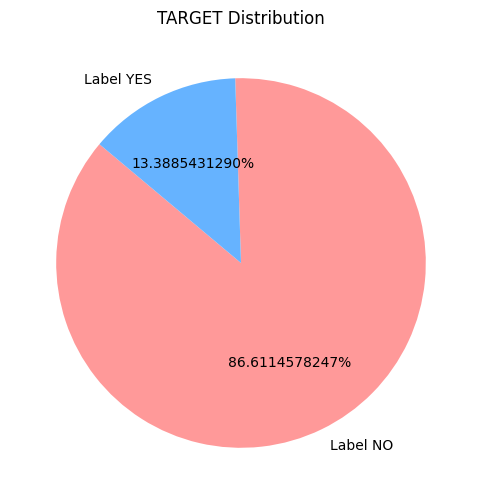

In [47]:
import matplotlib.pyplot as plt

sums = [NO_label, YES_label]
labels = ['Label NO', 'Label YES']

plt.figure(figsize=(8, 6))
plt.pie(sums, labels=labels, autopct='%1.10f%%', startangle=140, colors=['#ff9999','#66b3ff'])

plt.title('TARGET Distribution')

plt.show()

# Exploratory Data Analysis

## Age analysis

 * The main reason for this project is to predict future hospitalizations of older adults over 50 years of age. 
Analyzing the data, there are two variables that indicate the age of the surveyed population: ``rabyear ``, ``rwagey`` and ``swagey``

- rabyear represent the birth year of the respondent
- rwagey is the respondent's age in years at the time of the current wave's interview
- swagey is the current spouse's age in years at the time of the current wave’s interview and is taken from
the spouse's RwAGEY.
 

In [48]:
df['rabyear'].value_counts()

rabyear
1949.0    835
1950.0    814
1963.0    802
1964.0    783
1948.0    780
         ... 
1896.0      1
1899.0      1
1991.0      1
1993.0      1
2001.0      1
Name: count, Length: 103, dtype: int64

RwAGEY is the respondent's age in years at the time of the current wave's interview and it comes from the
recorded age in the sampling directory and SwAGEY is the current spouse's age in years at the time of the current wave’s interview and is taken from
the spouse's RwAGEY.

In [49]:
df_wave_1['r1agey'].value_counts()

r1agey
51.0     658
53.0     639
52.0     633
50.0     632
55.0     580
        ... 
25.0       1
99.0       1
105.0      1
20.0       1
100.0      1
Name: count, Length: 83, dtype: int64

In [50]:
df_wave_2['r2agey'].value_counts()

r2agey
55.0     534
53.0     525
54.0     508
56.0     494
58.0     481
        ... 
27.0       1
91.0       1
98.0       1
100.0      1
97.0       1
Name: count, Length: 76, dtype: int64

In [51]:
df_wave_3['s3agey'].value_counts()

s3agey
62.0     449
63.0     443
64.0     408
56.0     377
65.0     359
        ... 
102.0      1
110.0      1
24.0       1
26.0       1
112.0      1
Name: count, Length: 75, dtype: int64

* As we can see, there is a certain portion of the surveyed population under 50 years of age.

* We filter out individuals under 50 years old in each dataframe of each wave.

### Age filter

In [52]:
df_wave_1_age_filtered =  data_utils.filter_by_age(df_wave_1, 1)

df_wave_2_age_filtered =  data_utils.filter_by_age(df_wave_2, 2)

df_wave_3_age_filtered =  data_utils.filter_by_age(df_wave_3, 3)

df_wave_4_age_filtered =  data_utils.filter_by_age(df_wave_4, 4)


In [53]:
df_wave_3_age_filtered['s3agey'].value_counts()

s3agey
62.0     433
63.0     430
64.0     397
65.0     348
61.0     348
56.0     343
59.0     338
67.0     333
60.0     324
66.0     319
57.0     304
68.0     295
58.0     293
54.0     277
70.0     269
55.0     251
53.0     244
69.0     234
52.0     227
71.0     202
73.0     185
51.0     180
72.0     180
50.0     170
74.0     153
77.0     129
76.0     125
75.0     115
78.0     109
79.0      91
80.0      82
81.0      79
82.0      60
83.0      38
84.0      30
85.0      28
86.0      19
87.0      18
89.0      16
88.0      11
90.0      10
92.0       8
94.0       3
98.0       2
91.0       2
93.0       1
115.0      1
102.0      1
112.0      1
Name: count, dtype: int64

In [54]:
df_wave_2_age_filtered['r2agey'].value_counts()

r2agey
55.0    353
58.0    347
56.0    320
53.0    308
54.0    304
57.0    290
60.0    281
63.0    264
52.0    255
62.0    250
61.0    249
59.0    241
64.0    212
65.0    200
67.0    186
50.0    176
51.0    166
68.0    164
66.0    159
70.0    137
72.0    125
69.0    111
73.0    101
71.0     94
74.0     53
75.0     51
76.0     42
78.0     42
77.0     38
80.0     32
79.0     25
81.0     17
82.0     17
84.0     12
83.0     12
86.0      8
85.0      4
89.0      3
87.0      2
88.0      2
90.0      1
92.0      1
91.0      1
98.0      1
95.0      1
Name: count, dtype: int64

## Split into training and test sets



![alt text](image.png)


* To address variations in respondents' behavior over time, we propose a dual approach in our analysis, divided into two distinct studies. The first study utilizes the complete dataset to analyze the overall evolution of respondents' behavior across the four waves of the survey (TARGET feature is not present in Wave 5 dataset), aiming to identify trends and hospitalization patterns in the population over 50 years old in Mexico.

* The second study focuses on specific temporal groups, grouping waves 1 and 2 (2001 and 2003) in the first analysis to examine correlations within a short time frame, and waves 3 and 4 (2012 and 2015) in the second analysis. This approach allows for a more detailed evaluation of correlations and patterns over shorter intervals, given the considerable temporal gap between waves 2 and 3. The ultimate goal is to develop a pilot that compares the accuracy of the predictive models generated with each dataset, identifying the most effective approach for predicting hospitalizations and how temporal factors impact the accuracy of predictions.


* Steps to Perform the Split
 1. Concatenate the datasets to form groups
 2. Obtain Unique IDs.
 3. Split the IDs into Train and Test.
 4. Filter the original DataFrames according to the Train and Test IDs.
 
The main idea is to create the train-test split using the patient id as a reference. It doesn't matter if the same patient is in train n times, as long as the same patient is not in test.

In [55]:
# Concatenate the filtered DataFrames by joining all the datasets.
df_combined = pd.concat([
    df_wave_1_age_filtered,
    df_wave_2_age_filtered,
    df_wave_3_age_filtered,
    df_wave_4_age_filtered,
], ignore_index=True)

In [56]:

train_df, test_df = data_procces.split_train_test(df_combined, 'unhhidnp')

# Check that there are no duplicate IDs between train and test
train_ids_set = set(train_df['unhhidnp'])
test_ids_set = set(test_df['unhhidnp'])

# Checks
print("ID checks:")
print(f"Number of unique IDs in Train: {len(train_ids_set)}")
print(f"Number of unique IDs in Test: {len(test_ids_set)}")
print(f"IDs in Train and Test (should be empty): {train_ids_set.intersection(test_ids_set)}")

ID checks:
Number of unique IDs in Train: 10275
Number of unique IDs in Test: 2569
IDs in Train and Test (should be empty): set()


In [57]:
# save datasets as csv
data_procces.save_dataframes(train_df, test_df)

Files stored in the folder 'dataset'.


In [58]:
# Concatenate the filtered DataFrames by grouping them in two groups. 
df_combined_W1nW2 = pd.concat([
    df_wave_1_age_filtered,
    df_wave_2_age_filtered,
], ignore_index=True)

df_combined_W3nW4 = pd.concat([
    df_wave_3_age_filtered,
    df_wave_4_age_filtered,
], ignore_index=True)

In [59]:
train_df_W1nW2, test_df_W1nW2 = data_procces.split_train_test(df_combined_W1nW2, 'unhhidnp')

# Check that there are no duplicate IDs between train and test
train_ids_set_W1nW2 = set(train_df_W1nW2['unhhidnp'])
test_ids_set_W1nW2 = set(test_df_W1nW2['unhhidnp'])

# Checks
print("ID checks:")
print(f"Number of unique IDs in Train: {len(train_ids_set_W1nW2)}")
print(f"Number of unique IDs in Test: {len(test_ids_set_W1nW2)}")
print(f"IDs in Train and Test (should be empty): {train_ids_set_W1nW2.intersection(test_ids_set_W1nW2)}")

ID checks:
Number of unique IDs in Train: 6308
Number of unique IDs in Test: 1577
IDs in Train and Test (should be empty): set()


In [60]:
# save datasets as csv
data_procces.save_dataframes(train_df_W1nW2, test_df_W1nW2, suffix='_W1nW2')

Files stored in the folder 'dataset'.


In [61]:
train_df_W3nW4, test_df_W3nW4 = data_procces.split_train_test(df_combined_W3nW4, 'unhhidnp')

# Check that there are no duplicate IDs between train and test
train_ids_set_W3nW4 = set(train_df_W3nW4['unhhidnp'])
test_ids_set_W3nW4 = set(test_df_W3nW4['unhhidnp'])

# Checks
print("ID checks:")
print(f"Number of unique IDs in Train: {len(train_ids_set_W3nW4)}")
print(f"Number of unique IDs in Test: {len(test_ids_set_W3nW4)}")
print(f"IDs in Train and Test (should be empty): {train_ids_set_W3nW4.intersection(test_ids_set_W3nW4)}")

ID checks:
Number of unique IDs in Train: 7259
Number of unique IDs in Test: 1815
IDs in Train and Test (should be empty): set()


In [62]:
# save datasets as csv
data_procces.save_dataframes(train_df_W3nW4, test_df_W3nW4, suffix='_W3nW4')

Files stored in the folder 'dataset'.


In [64]:


# Cargar el archivo CSV grande
file_path = 'C:\Users\Production\Downloads\DataTes1.csv'  # Reemplaza con la ruta de tu archivo
df = pd.read_csv(file_path)

# Crear una muestra aleatoria del 10% del conjunto de datos (ajusta el porcentaje según sea necesario)
df_sample = df.sample(frac=0.1, random_state=42)

# Guardar la muestra en un nuevo archivo CSV
sample_file_path = 'C:\Users\Production\Downloads\test'  # Reemplaza con la ruta donde deseas guardar el archivo de muestra
df_sample.to_csv(sample_file_path, index=False)

print(f"Muestra creada y guardada en {sample_file_path}")


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (699283405.py, line 2)

In [65]:
import pandas as pd

# Cargar el archivo CSV grande usando una cadena de texto cruda
file_path = r'C:\Users\Production\Downloads\DataTes1.csv'  # Reemplaza con la ruta de tu archivo
df = pd.read_csv(file_path)

# Crear una muestra aleatoria del 10% del conjunto de datos (ajusta el porcentaje según sea necesario)
df_sample = df.sample(frac=0.1, random_state=42)

# Guardar la muestra en un nuevo archivo CSV usando una cadena de texto cruda
sample_file_path = r'C:\Users\Production\Downloads\test\sample_data.csv'  # Reemplaza con la ruta donde deseas guardar el archivo de muestra
df_sample.to_csv(sample_file_path, index=False)

print(f"Muestra creada y guardada en {sample_file_path}")


C:\Users\Production\AppData\Local\Temp\ipykernel_2852\3364992155.py:5: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Muestra creada y guardada en C:\Users\Production\Downloads\test\sample_data.csv
